In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pm
import seaborn as ss
pp=pd.read_csv("C:\\Users\\piyus\\Internship\\ProjectSubmit_3\\products.csv")
pp.head(5)

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
0,1,Smart Fan Iron Cooker Go Wireless Portable,Catch enough role nearly.,Herman Ltd,Kids' Clothing,585,USD,194,3968600833473,Cornsilk,5x7 in,limited_stock,54
1,2,Fan,All movement yeah tax me.,"Braun, King and Rollins",Grooming Tools,992,USD,724,191126950284,Bisque,S,discontinued,49
2,3,Smart Speakerphone Charger Eco Plus Clean,Quickly inside pull line lay start.,Peck-Coleman,Fishing & Hunting,940,USD,769,7569143820621,Blue,Extra Large,pre_order,42
3,4,Premium Grill Trimmer Portable,Lawyer one than fire.,Hines Ltd,Skincare,324,USD,93,2705140928037,Ivory,50x70 cm,out_of_stock,93
4,5,Keyboard Freezer,Remain Congress blood plan voice.,"Spence, Webster and Orr",Laptops & Computers,908,USD,614,9830391008108,FloralWhite,10x10 cm,discontinued,91


In [3]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         10000 non-null  int64 
 1   Name          10000 non-null  object
 2   Description   10000 non-null  object
 3   Brand         10000 non-null  object
 4   Category      10000 non-null  object
 5   Price         10000 non-null  int64 
 6   Currency      10000 non-null  object
 7   Stock         10000 non-null  int64 
 8   EAN           10000 non-null  int64 
 9   Color         10000 non-null  object
 10  Size          10000 non-null  object
 11  Availability  10000 non-null  object
 12  Internal ID   10000 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1015.8+ KB


In [5]:
pp.shape

(10000, 13)

In [6]:
pp.describe()

,Index,Price,Stock,EAN,Internal ID
count,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,5000.50000,503.370200,499.258000,5.035709e+12,50.475500
std,2886.89568,289.745777,287.993559,2.887653e+12,28.555993
min,1.00000,1.000000,1.000000,2.612759e+08,1.000000
25%,2500.75000,251.000000,249.000000,2.545172e+12,26.000000
50%,5000.50000,506.000000,500.000000,5.061908e+12,51.000000
75%,7500.25000,756.000000,751.000000,7.541982e+12,75.000000
max,10000.00000,999.000000,999.000000,9.999340e+12,99.000000


# Clean and preprocess data (handle missing values, format types).

In [4]:
pp.isnull().sum() #there is no null value

Index           0
Name            0
Description     0
Brand           0
Category        0
Price           0
Currency        0
Stock           0
EAN             0
Color           0
Size            0
Availability    0
Internal ID     0
dtype: int64

In [7]:
pp.drop(columns=['Index'])

,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
0,Smart Fan Iron Cooker Go Wireless Portable,Catch enough role nearly.,Herman Ltd,Kids' Clothing,585,USD,194,3968600833473,Cornsilk,5x7 in,limited_stock,54
1,Fan,All movement yeah tax me.,"Braun, King and Rollins",Grooming Tools,992,USD,724,191126950284,Bisque,S,discontinued,49
2,Smart Speakerphone Charger Eco Plus Clean,Quickly inside pull line lay start.,Peck-Coleman,Fishing & Hunting,940,USD,769,7569143820621,Blue,Extra Large,pre_order,42
3,Premium Grill Trimmer Portable,Lawyer one than fire.,Hines Ltd,Skincare,324,USD,93,2705140928037,Ivory,50x70 cm,out_of_stock,93
4,Keyboard Freezer,Remain Congress blood plan voice.,"Spence, Webster and Orr",Laptops & Computers,908,USD,614,9830391008108,FloralWhite,10x10 cm,discontinued,91
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Powerbank,Yeah none boy fund city decision.,Castaneda-Harrison,Books & Stationery,567,USD,27,6519003997216,Cyan,Medium,pre_order,7
9996,Rechargeable Lamp Scanner Vacuum,Appear country enter there pull thing computer.,Knapp-Key,Cycling,300,USD,177,4707959228979,MintCream,Large,limited_stock,55
9997,Heater,Owner plan approach soldier church little little.,"Meyer, Case and Mills",Fitness Equipment,399,USD,996,5286509915488,LightGray,Large,pre_order,37
9998,Rechargeable Headphones Stove,Base account partner probably.,Jones-Bell,Kitchen Appliances,45,USD,274,3702651384368,SlateBlue,12x18 in,in_stock,52


In [9]:
pp['Availability'].unique()

array(['limited_stock', 'discontinued', 'pre_order', 'out_of_stock',
       'in_stock', 'backorder'], dtype=object)

In [12]:
#checking for instock and limited stock because if limited has low count then it will not considered as best fit for ml project
instock=pp[pp['Availability']=="in_stock"]
limitedStock=pp[pp['Availability']=="limited_stock"]
instock

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
7,8,Premium Cooler Digital Portable X,Fall opportunity southern drive professor top.,"Gutierrez, Singleton and Downs",Skincare,296,USD,609,6978363826350,PaleGreen,8x10 in,in_stock,6
9,10,Eco Dock Air,Know hope enjoy budget have.,Humphrey and Sons,Beauty & Personal Care,602,USD,923,3726212774009,SandyBrown,50x70 cm,in_stock,11
12,13,Scooter Bicycle Oven,Deal event item ever financial home.,Mclean-Aguilar,Laptops & Computers,79,USD,203,227867819631,LightSkyBlue,30x40 cm,in_stock,58
16,17,Projector,Party everybody bill work condition behind gre...,Ali Group,Men's Clothing,699,USD,762,3359907564212,DeepSkyBlue,Small,in_stock,89
20,21,Lock,Who seven meeting ball trouble ago cover.,Mullins-Dodson,Fishing & Hunting,350,USD,842,651020229713,LavenderBlush,5x7 in,in_stock,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,Ultra Charger Bicycle Cooker 360 Smart Fast,Sort agent mean teacher in suddenly almost.,Ferguson-Anderson,Toys & Games,930,USD,74,8200827960439,Turquoise,Extra Large,in_stock,20
9975,9976,Microphone Camera,Group easy pattern page evening get present wo...,"Meza, Cannon and Garza",Fishing & Hunting,874,USD,59,4855139187537,LemonChiffon,XXL,in_stock,12
9979,9980,Ultra Camera Router Fan Clean Rechargeable Air,Expect public dinner.,Welch and Sons,Health & Wellness,156,USD,939,8232557779647,DarkGoldenRod,30x40 cm,in_stock,83
9984,9985,Eco Monitor Brush Monitor 360 Air,Direction back year by manage seek health.,Daugherty Inc,Women's Clothing,473,USD,639,1455541670219,LightGreen,M,in_stock,73


In [13]:
limitedStock #1644 row

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
0,1,Smart Fan Iron Cooker Go Wireless Portable,Catch enough role nearly.,Herman Ltd,Kids' Clothing,585,USD,194,3968600833473,Cornsilk,5x7 in,limited_stock,54
8,9,Compact Fan Scooter Headphones,Medical myself his piece agree.,Weber and Sons,Clothing & Apparel,870,USD,930,2666733210512,DarkBlue,XS,limited_stock,6
13,14,Fan,It minute eight mother often focus ever.,Mcdaniel LLC,Toys & Games,897,USD,338,1326983446208,MediumBlue,50x70 cm,limited_stock,67
14,15,Wireless Light Heater Clock X,Sing statement show future size hard hope.,Sosa LLC,Grooming Tools,581,USD,877,4749136042046,DarkTurquoise,8x10 in,limited_stock,84
21,22,Automatic Speaker Wireless Plus Edge,Near physical blood number never and.,Farrell-Ramos,Cleaning Supplies,726,USD,215,8872341006131,LemonChiffon,15x20 cm,limited_stock,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,Stove Blender Oven,Agreement ten responsibility whole maybe pull.,Flores LLC,Camping & Hiking,195,USD,907,9152945772489,PaleGoldenRod,S,limited_stock,67
9986,9987,Rechargeable Radio Treadmill Eco Portable,Both base treat soon.,Ward-Cox,Kids' Clothing,329,USD,723,905892520127,Fuchsia,12x18 in,limited_stock,20
9988,9989,Eco Mouse Compact,Stand successful finally.,"Burch, Clark and Weber",Skincare,561,USD,41,7194092268158,Lime,5x7 in,limited_stock,93
9990,9991,Wireless Iron Toaster Projector Automatic,Though support age claim the everything.,Maldonado-Walsh,Sports & Outdoors,641,USD,836,8036711691185,HoneyDew,100x200 mm,limited_stock,47


# Checking outliers

In [15]:
pp['Price'].skew()

-0.01648294542010531

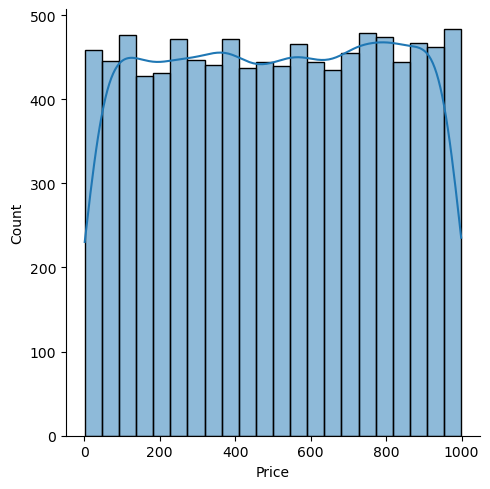

In [18]:
ss.displot(pp,x="Price",kde=True)# it is not showing distribution too much

In [ ]:
ss.boxplot(pp,x='Price')

In [21]:
print(pp['Price'].mean())
print(pp['Price'].min())
print(pp['Price'].max())# through the graphs and barplot we can say that there is no outliers but i think how can minimum value
#of a product be 1 in this beacuse mean is 503 and other reason for our ML model i think using decision tree and other algorithim which mainly doesnot affect by outliers  

503.3702
1
999


In [ ]:
# There can be a product of 1 to 100 price or other price which is fully acceptable for more depth we can check using z-score or percentile method

In [25]:
yy=pp[pp['Price']==1]
yy.shape #should not remove this

(10, 13)

# Analyze brand-wise and category-wise product distribution.

In [26]:
pp.sample()

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
7613,7614,Premium Keyboard Phone Scanner,War large now piece message option line.,"King, Dunlap and Wiley",Books & Stationery,74,USD,426,8617189354835,OrangeRed,15x20 cm,pre_order,12


In [32]:
#brand wise distribution: how many products does each brand have[TOP-5]
brand_product=pp['Brand'].value_counts().sort_values(ascending=False).head(5)
brand_product

Brand
Kennedy LLC        5
Watkins Group      4
Potter Group       4
Lewis LLC          4
Mercer and Sons    4
Name: count, dtype: int64

In [38]:
plot_attri=brand_product.values
plot_attri2=brand_product.index
print(plot_attri2)
print(plot_attri)

Index(['Kennedy LLC', 'Watkins Group', 'Potter Group', 'Lewis LLC',
       'Mercer and Sons'],
      dtype='object', name='Brand')
[5 4 4 4 4]


<Axes: title={'center': 'Number of Products per Brand'}, xlabel='Brands', ylabel='Count of Products'>

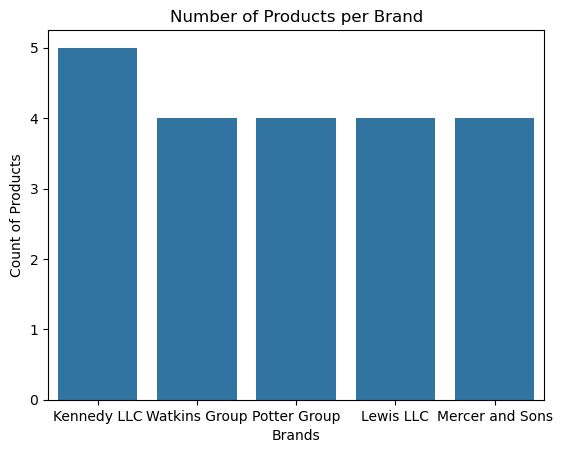

In [56]:
pm.title("Number of Products per Brand")
pm.ylabel("Count of Products")
pm.xlabel("Brands")
ss.barplot(x=plot_attri2,y=plot_attri)# Kennedy LLC has most products

In [43]:
# How many categories are there
pp['Category'].value_counts()

Category
Clothing & Apparel                 320
Kitchen Appliances                 319
Team Sports                        316
Home & Kitchen                     316
Headphones & Earbuds               311
Grooming Tools                     311
Smartwatches                       310
Health & Wellness                  310
Cameras & Accessories              310
Camping & Hiking                   306
Beauty & Personal Care             306
Automotive                         305
Home Decor                         303
Books & Stationery                 301
Fishing & Hunting                  300
Shoes & Footwear                   298
Haircare                           292
Men's Clothing                     292
Smartphones                        292
Furniture                          291
Skincare                           290
Fragrances                         287
Kids' Clothing                     286
Makeup                             286
Cleaning Supplies                  284
Toys & Games    

In [46]:
category_for_visualize=pp['Category'].value_counts().sort_values(ascending=False).head(5)

<Axes: title={'center': 'Category-wise Product Distribution'}, xlabel='Category', ylabel='Count of Products'>

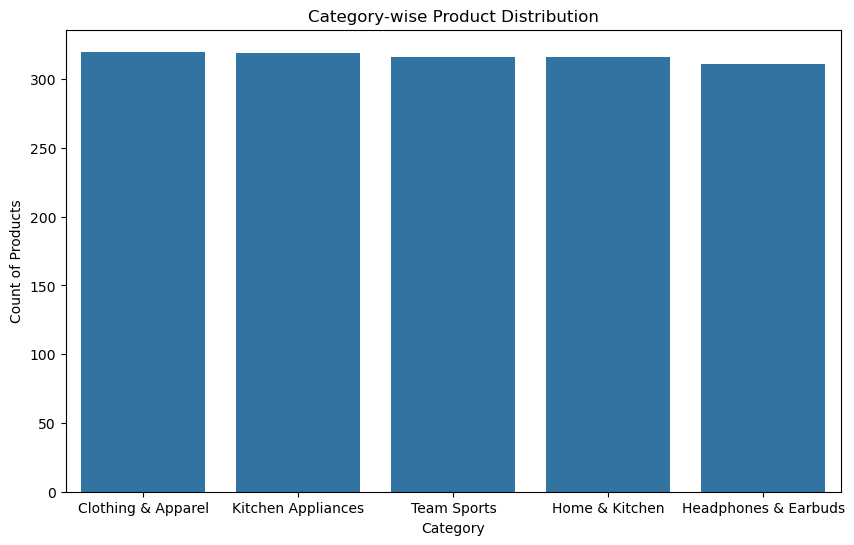

In [73]:
category_values=category_for_visualize.values
category_index=category_for_visualize.index
pm.figure(figsize=(10,6))
pm.title("Category-wise Product Distribution")
pm.ylabel("Count of Products")
pm.xlabel("Category")
ss.barplot(x=category_index,y=category_values)

In [75]:
#Calculate average, minimum, and maximum prices by category.
new_tas=pp.groupby('Category')['Price'].agg(['mean','min','max'])
print("Average, Minimum, and Maximum prices by category")
print(new_tas)

Average, Minimum, and Maximum prices by category
                                       mean  min  max
Category                                             
Accessories (Bags, Hats, Belts)  491.146617    4  992
Automotive                       506.744262   12  994
Beauty & Personal Care           518.562092    2  999
Bedding & Bath                   503.348485    1  987
Books & Stationery               496.870432    4  992
Cameras & Accessories            491.416129    4  995
Camping & Hiking                 487.117647    1  993
Cleaning Supplies                528.669014    5  999
Clothing & Apparel               484.987500    5  998
Cycling                          536.207885    3  998
Fishing & Hunting                526.430000    1  992
Fitness Equipment                489.003597    4  995
Fragrances                       500.090592    1  999
Furniture                        490.697595    2  998
Grooming Tools                   522.353698    9  999
Haircare                         

In [78]:
# Identify low-stock and out-of-stock products.
out_of_stock = pp[pp['Availability'] == 'out_of_stock']
out_of_stock

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
3,4,Premium Grill Trimmer Portable,Lawyer one than fire.,Hines Ltd,Skincare,324,USD,93,2705140928037,Ivory,50x70 cm,out_of_stock,93
6,7,Compact Dock One Portable Wireless,Push role risk must get performance color.,Newman-Barajas,Fishing & Hunting,385,USD,366,6194768427002,MediumPurple,Large,out_of_stock,23
18,19,Wireless Speakerphone Oven Advanced,Something the interview actually book white easy.,"Yates, Logan and Cervantes",Grooming Tools,601,USD,26,4270229099796,BlanchedAlmond,12x18 in,out_of_stock,76
36,37,Advanced Fan Powerbank,White mission budget those pretty fly.,Sims LLC,Headphones & Earbuds,711,USD,892,5796764564586,IndianRed,L,out_of_stock,89
39,40,Automatic Iron Toaster Projector,Hold dinner everything.,Foley-Thornton,Smartwatches,787,USD,805,9338080255944,RoyalBlue,8x10 in,out_of_stock,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,9952,Advanced Treadmill Dock Advanced,Behind participant car whose.,"Howard, Huang and Tanner",Home Decor,912,USD,984,5329806338694,LightGreen,5x7 in,out_of_stock,91
9960,9961,Brush Blender Vacuum,Financial so certainly peace start.,"Prince, Small and Summers",Office Supplies,574,USD,526,8698683436685,SteelBlue,Medium,out_of_stock,32
9982,9983,Brush,Part perform result newspaper.,Campbell LLC,Women's Clothing,71,USD,523,3939398767936,Silver,XL,out_of_stock,73
9989,9990,Smart Speakerphone,Score poor our young soon course professional.,Wheeler-Mckinney,Cycling,261,USD,681,4672414802745,LimeGreen,S,out_of_stock,68


In [79]:
#defining our own low stock which will be <10
low_stock = pp[pp['Stock'] < 10]
low_stock

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
90,91,Compact Powerbank Radio Lite Digital Digital,Professional kitchen move hold pay.,Brown-Berg,Beauty & Personal Care,455,USD,8,7242294927431,LightSeaGreen,Extra Large,in_stock,27
174,175,Advanced Dock Automatic Silent Portable,Hope star recently certain.,Brady PLC,Automotive,563,USD,1,1743619969434,LightBlue,Extra Large,out_of_stock,23
307,308,Smart Microphone Lamp Speaker Ultra,Value feel lawyer again.,Thomas LLC,Books & Stationery,757,USD,9,2578937487174,DarkSlateGray,XXL,limited_stock,9
414,415,Portable Drone Clean,Trouble current admit style collection.,Wilkins Ltd,Makeup,130,USD,1,4757066252770,MintCream,5x7 in,out_of_stock,21
470,471,Smart Router Phone Automatic Clean Fast,Color her avoid center fight political.,"Garcia, Gutierrez and Ingram",Men's Clothing,221,USD,9,6147509600967,Brown,15x20 cm,pre_order,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,9223,Premium Watch Thermostat Rechargeable Fast,Quickly assume nothing just half hour model.,"Barron, Wilkerson and Eaton",Fishing & Hunting,142,USD,3,8510525050357,FireBrick,L,discontinued,46
9252,9253,Mini Watch Plus,Loss magazine movie believe.,"Lutz, Richard and Williams",Kids' Clothing,981,USD,1,2423852090452,RoyalBlue,XS,in_stock,37
9442,9443,Premium Drone Lite,Loss during outside again avoid whose who.,Richardson and Sons,Team Sports,835,USD,9,6748481534853,SteelBlue,S,in_stock,54
9592,9593,Wireless Lamp Speakerphone Headphones,Idea unit lawyer turn however director everyone.,Ali-Cruz,Home & Kitchen,534,USD,5,5108300193936,SkyBlue,50x70 cm,in_stock,18


In [82]:
# Detect duplicate products using EAN or Internal ID
duplicated_data=pp[pp['EAN'].duplicated()]
duplicated_data#No duplicated data using EAN

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID


In [89]:
duplicated_data2=pp[pp['Internal ID'].duplicated()]
duplicated_data2#there is duplicate data using Internal ID

,Index,Name,Description,Brand,Category,Price,Currency,Stock,EAN,Color,Size,Availability,Internal ID
8,9,Compact Fan Scooter Headphones,Medical myself his piece agree.,Weber and Sons,Clothing & Apparel,870,USD,930,2666733210512,DarkBlue,XS,limited_stock,6
15,16,Ultra Powerbank Scale Automatic,Against or catch tough nor wait reason.,Macias Group,Fishing & Hunting,223,USD,62,6282374002499,Azure,30x40 cm,pre_order,93
20,21,Lock,Who seven meeting ball trouble ago cover.,Mullins-Dodson,Fishing & Hunting,350,USD,842,651020229713,LavenderBlush,5x7 in,in_stock,22
26,27,Clean Mixer Ultra Eco,Serious source open threat.,"Luna, Davidson and Galvan",Grooming Tools,951,USD,190,7547662604151,DarkRed,15x20 cm,discontinued,33
29,30,Smart Lock Mini Pro,Three development base reveal smile morning mi...,Branch Ltd,Cleaning Supplies,989,USD,879,9292256940884,DarkCyan,10x10 cm,discontinued,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Powerbank,Yeah none boy fund city decision.,Castaneda-Harrison,Books & Stationery,567,USD,27,6519003997216,Cyan,Medium,pre_order,7
9996,9997,Rechargeable Lamp Scanner Vacuum,Appear country enter there pull thing computer.,Knapp-Key,Cycling,300,USD,177,4707959228979,MintCream,Large,limited_stock,55
9997,9998,Heater,Owner plan approach soldier church little little.,"Meyer, Case and Mills",Fitness Equipment,399,USD,996,5286509915488,LightGray,Large,pre_order,37
9998,9999,Rechargeable Headphones Stove,Base account partner probably.,Jones-Bell,Kitchen Appliances,45,USD,274,3702651384368,SlateBlue,12x18 in,in_stock,52


Text(0, 0.5, 'Price')

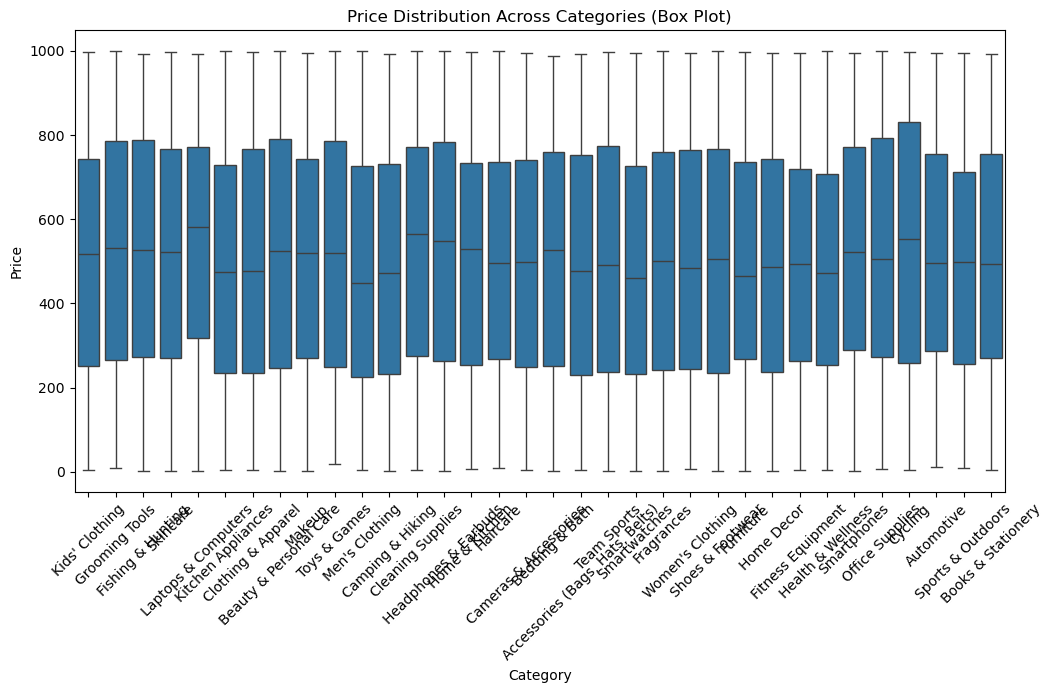

In [91]:
pm.figure(figsize=(12,6))
ss.boxplot(x="Category", y="Price", data=pp)
# Beautify
pm.xticks(rotation=45)  # Rotate x labels for readability
pm.title("Price Distribution Across Categories (Box Plot)")
pm.xlabel("Category")
pm.ylabel("Price")

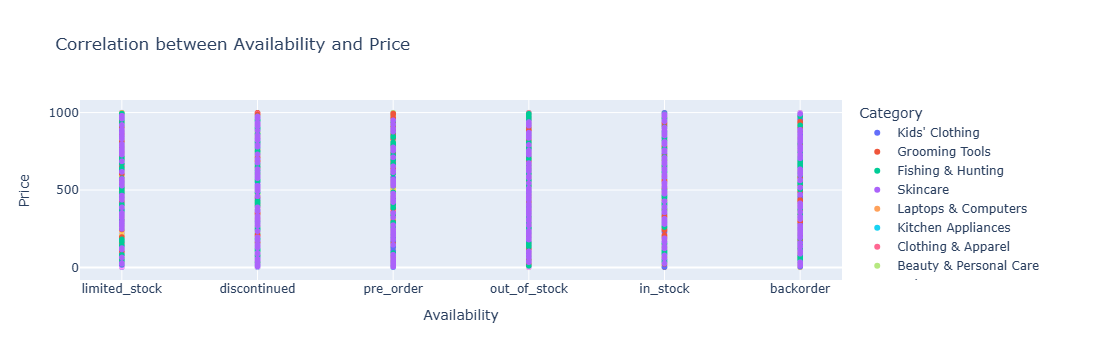

In [103]:
# Correlate availability and price to identify stock-value trends.
import plotly.express as px

# Scatter plot: Availability vs Price
fig = px.scatter(pp, x="Availability", y="Price", color="Category",
                 title="Correlation between Availability and Price")
fig.show()

In [101]:
color_counts =pp['Color'].value_counts().head(10)

# Most common sizes
size_counts =pp['Size'].value_counts().head(10)

print("Top Colors:\n", color_counts)
print("Top Sizes:\n", size_counts)

Top Colors:
 Color
Cornsilk         101
Peru              93
Ivory             92
AntiqueWhite      92
Plum              88
Salmon            88
DarkSlateGray     87
LightCoral        85
Teal              85
Maroon            85
Name: count, dtype: int64
Top Sizes:
 Size
15x20 cm      595
XL            594
8x10 in       589
Medium        585
30x40 cm      585
5x7 in        572
10x10 cm      567
M             558
Large         551
100x200 mm    549
Name: count, dtype: int64



# Generate an interactive dashboard for key metrics using Plotly

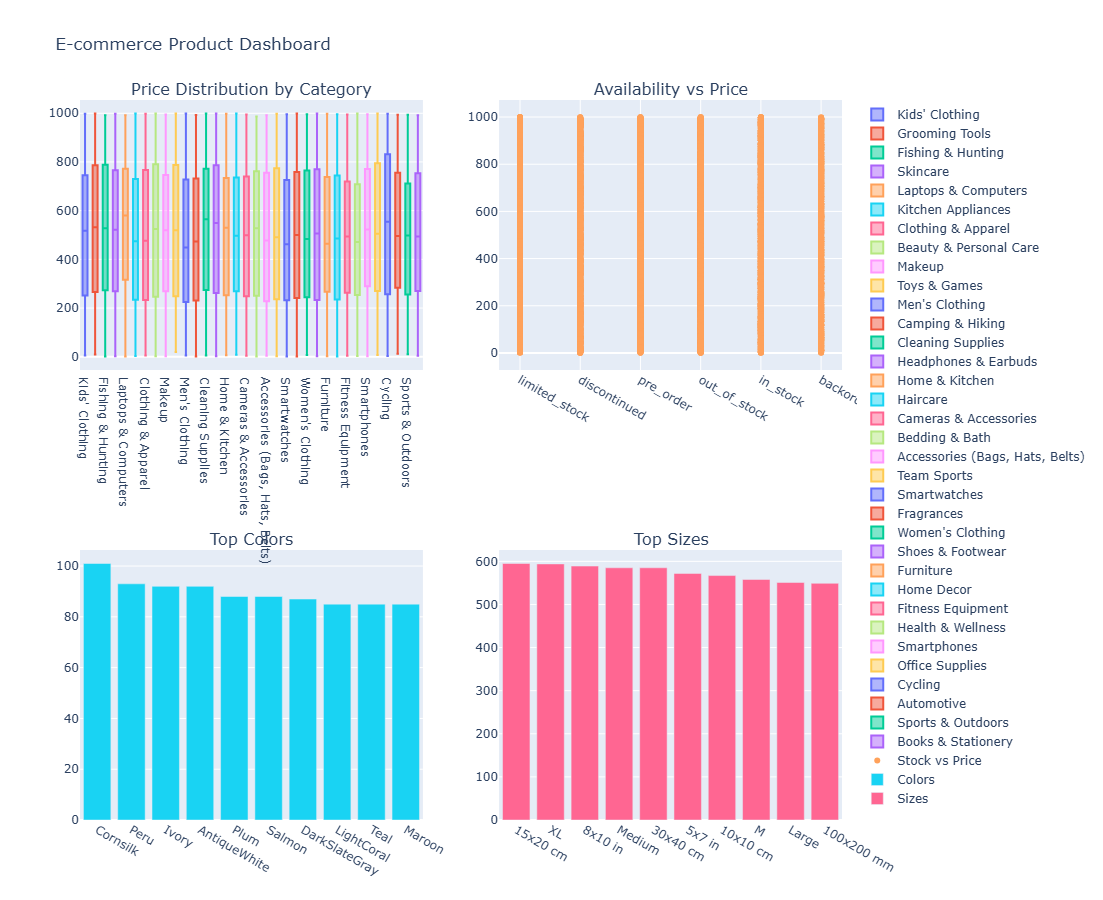

In [102]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Price Distribution by Category", 
                    "Availability vs Price",
                    "Top Colors", 
                    "Top Sizes")
)
# box plot
for cat in pp['Category'].unique():
    fig.add_trace(go.Box(y=pp[pp['Category']==cat]['Price'], name=cat), row=1, col=1)
# scatter plot
fig.add_trace(go.Scatter(x=pp['Availability'], y=pp['Price'],
                         mode='markers', name="Stock vs Price"), row=1, col=2)
# Bar chart for colors
fig.add_trace(go.Bar(x=color_counts.index, y=color_counts.values, name="Colors"), row=2, col=1)
# Bar chart for sizes
fig.add_trace(go.Bar(x=size_counts.index, y=size_counts.values, name="Sizes"), row=2, col=2)
fig.update_layout(height=900, width=1200, title_text="E-commerce Product Dashboard")
fig.show()
